# Grouping data

A single pandas DataFrame can often be decomposed into smaller subsets of data that need to be visualized.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> contains multiple grouping levels to expose unique subsets of data:
<ul>
<li><font style="font-family:'Courier New'">legend</font>: color lines and markers according to unique values in a DataFrame column</li>
<li><font style="font-family:'Courier New'">groups</font>:</li>
<ul>
<li>for xy plots: separates unique subsets so plot lines are not continuously looped back to the origin (useful for replicates of similar data)</li>
<li>for boxplots: groups boxes by unique values in one or more DataFrame columns</li>
</ul>
<li><font style="font-family:'Courier New'">row | column</font>: makes a grid of subplots for each unique value of the DataFrame column names specified for these keyword arguments within a single figure</li>
<li><font style="font-family:'Courier New'">wrap</font>: 
<ul>
<li>Option 1: similar to row and column grouping, wrap makes a grid of subplots for each <i>unique value</i> of the DataFrame column names specified for these keyword arguments within a single figure</li>
<li>Option 2: wrap by `x` or `y` to create a uniqe subplot for each <i>column name</i> listed</li>
</ul>
<li><font style="font-family:'Courier New'">figure</font>:  makes a unique figure for each unique value of a DataFrame column</li>
</ul>

It is also possible to filter data inline sets via the keyword <font style="font-family:'Courier New'">filter</font>.  

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

In [2]:
df1 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data.csv'))
df2 = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))

## legend

The `legend` keyword can be a single DataFrame column name or a list of column names.  The data set will then be grouped according to each unique value of the `legend` column and a separate plot for each value will be added to the figure.  A different color and marker type will be used to display each value.

### Single legend column

In our sample data set, we have repeats of the same current vs. voltage measurement at three different "Die" locations.  By setting the `legend` keyword equal to the name of the DataFrame column containing the "Die" value, we can distinctly visualize the measurement for each site.

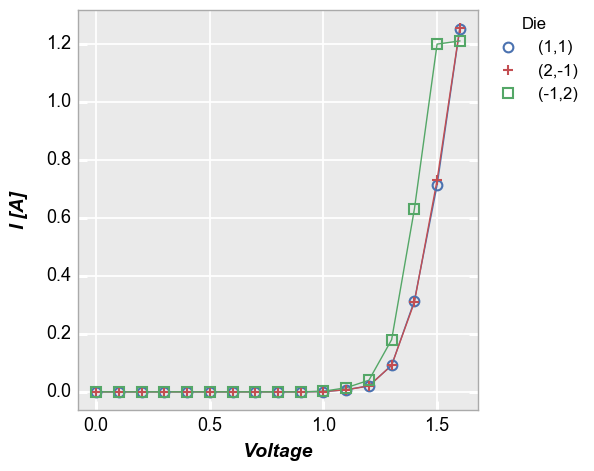

In [8]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple legend columns

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> also supports legending by multiple DataFrame columns.  When a list of column names is passed to the `legend` keyword, a dummy column is created in the DataFrame that concatenates the values from each column listed in `legend`.  This new column is used for legending.

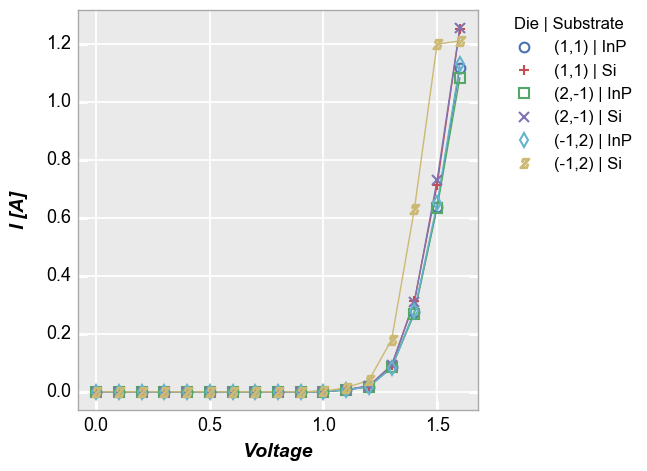

In [4]:
fcp.plot(df1, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

### Multiple x & y values 

When plotting more than one DataFrame column on the y axis <i>without</i> a specific grouping column, a legend is also enabled to improve visualization of the data.  The legend can be disabled by setting `legend=False`.

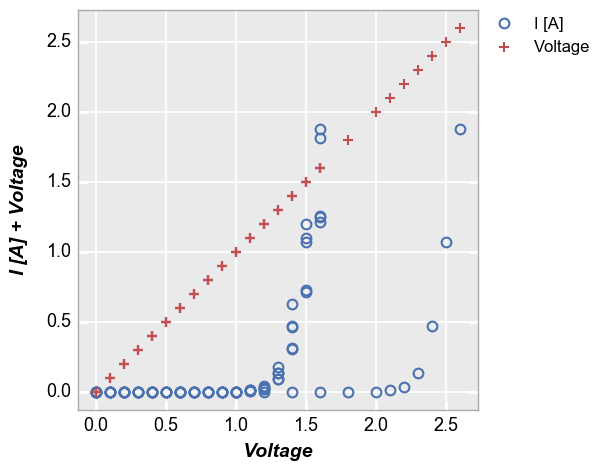

In [5]:
fcp.plot(df1, x='Voltage', y=['I [A]', 'Voltage'], lines=False, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

### Secondary x|y plots

Three options are available for legending are available for plots with a secondary axis: (1) no legend; (2) legend based on the values of the primary/secondary axes; or (3) legend based on another column.

#### No legend

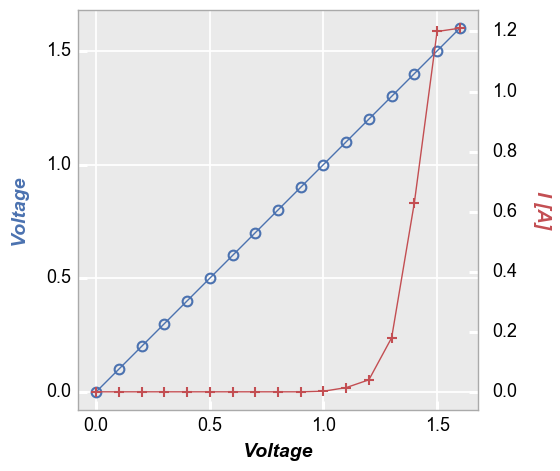

In [6]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

#### Axis legend

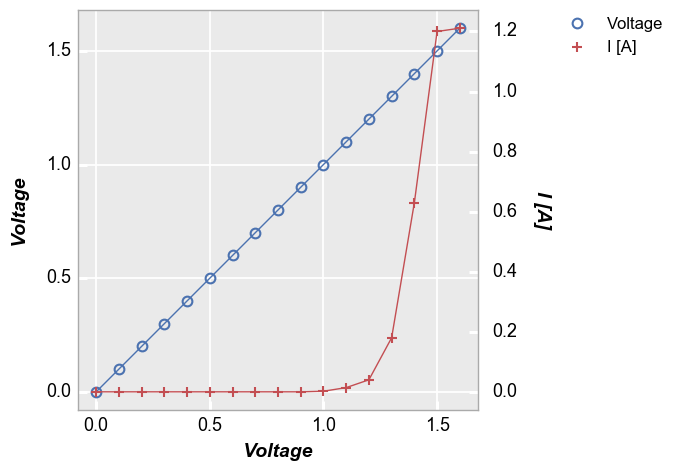

In [7]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend=True,
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

#### Legend by another column

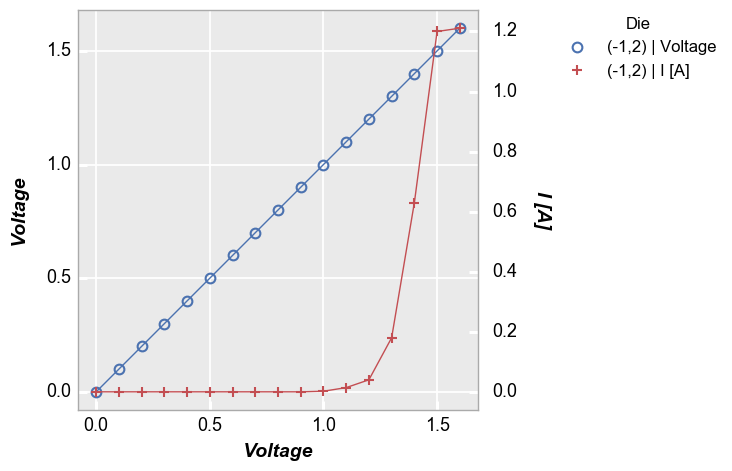

In [8]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

## groups

The `groups` keyword requires a column name or list of column names from the DataFrame.  These columns are used to identify subsets in the data and make sure they are properly visualize in the plot.  Unlike `legend`, group values are not added to a legend on the plot.

### xy plots

Some data sets contain multiple sets of similar data.  Consider the following example where we  plot all the data together and connect the points with lines.  Notice how the line loops from the end of the data back to the begining for each "group" of the data.  This occurs because we have provided no information about how to segment the data set.

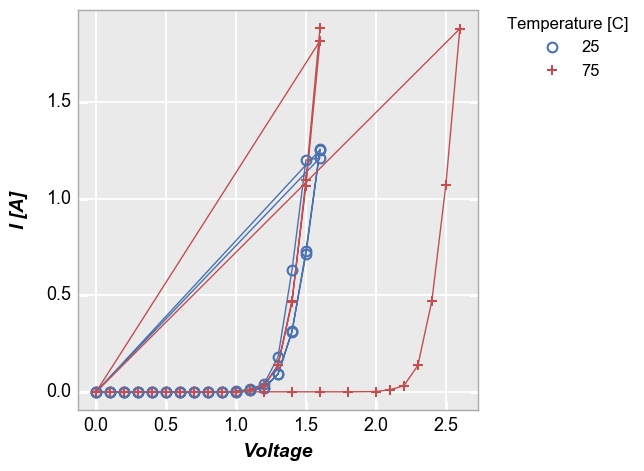

In [9]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Temperature [C]', \
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

To handle cases like this, we can add the keyword `groups` and specify another DataFrame column name that indicates how the data are grouped (in this case by "Die").  Now we get distinct lines for each instance of the measurement data.  The `groups` keyword can still be combined with a legend from a different DataFrame column.

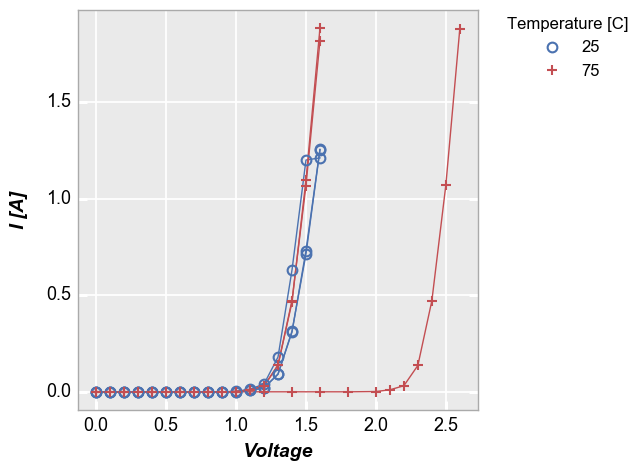

In [10]:
fcp.plot(df1, x='Voltage', y='I [A]', groups='Die', legend='Temperature [C]', \
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

`groups` also supports multiple column names.  Here is the above plot without legending by "Temperature [C]":

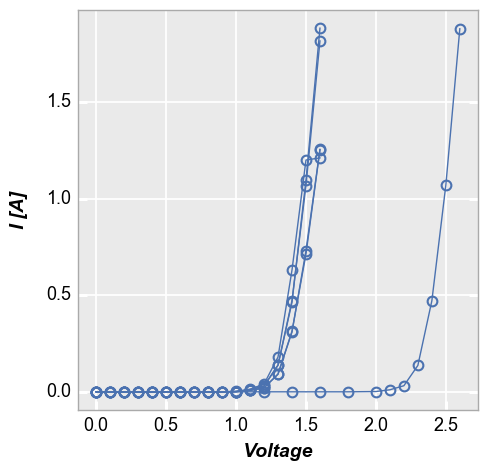

In [11]:
fcp.plot(df1, x='Voltage', y='I [A]', groups=['Die', 'Temperature [C]'], 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2')

### boxplots

Like x-y plots, the `groups` keyword is used to break the data set into subsets.  However, for boxplots the group column names and values are actually displayed along the x-axis:

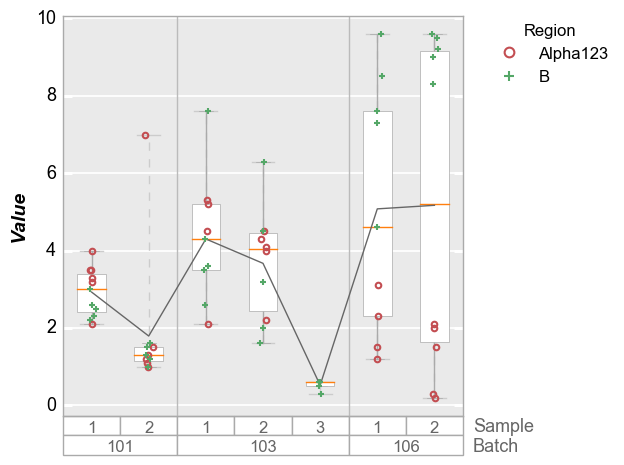

In [12]:
df_box = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
fcp.boxplot(df=df_box, y='Value', groups=['Batch', 'Sample'], legend='Region')

## row | col subplots

### By unique values

To see a larger subset of the main DataFrame, we can make a grid of subplots based on the unique values within DataFrame columns <i>other than the primary x and y columns we are using</i>.  In this case, we remove the "Temperature [C]" and "Boost Level" columns from the <font style="font-family:'Courier New'">filter</font> keyword and add them to the <font style="font-family:'Courier New'">row</font> and <font style="font-family:'Courier New'">column</font> commands, respectively.  This gives a grid of plots where each plot represents the intersection of a unique Boost Level and Temperature.

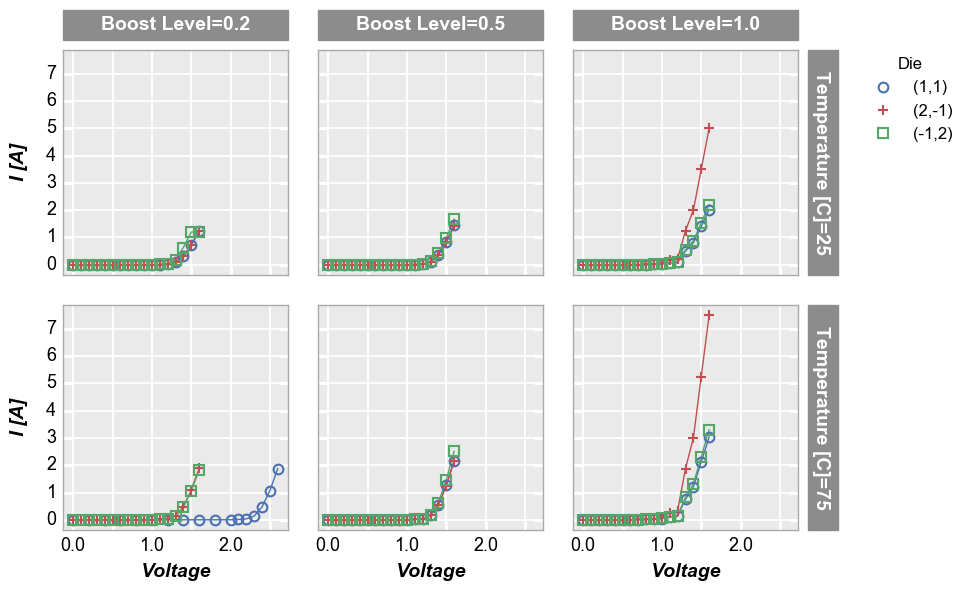

In [13]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=14)

### By x or y

Alternatively, we can use row vs column grids to compare different `x` or `y` values.  For example, we can plot two y-columns (one per row) by adding the keyword `"y"` to the `row` parameter.  Each column in this plot shares the same x-axis variable.

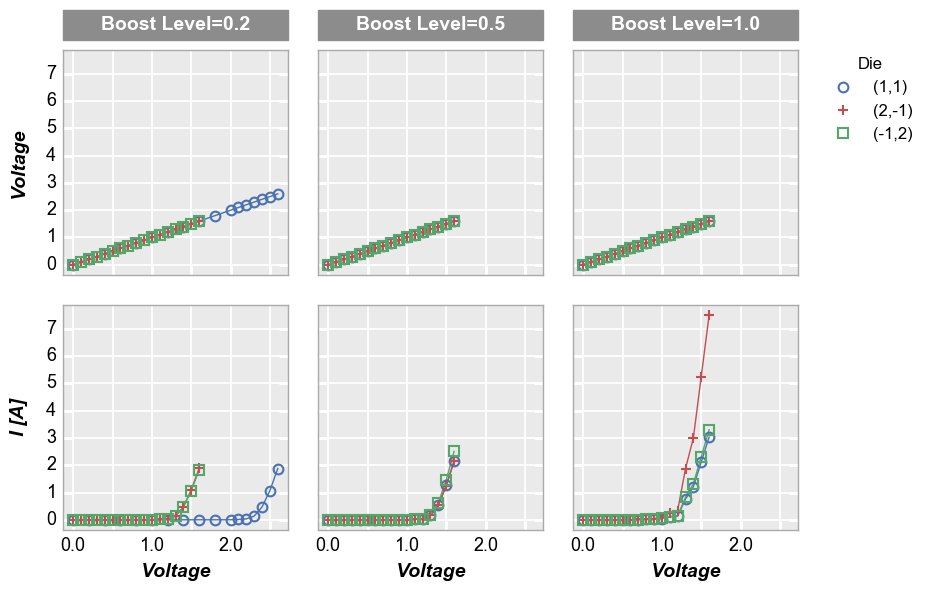

In [14]:
fcp.plot(df1, x='Voltage', y=['Voltage', 'I [A]'], legend='Die', col='Boost Level', row='y', 
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==75', 
         label_rc_font_size=14)

We can make a similar plot with common `row` values and different x-axes by setting `col='x'`:

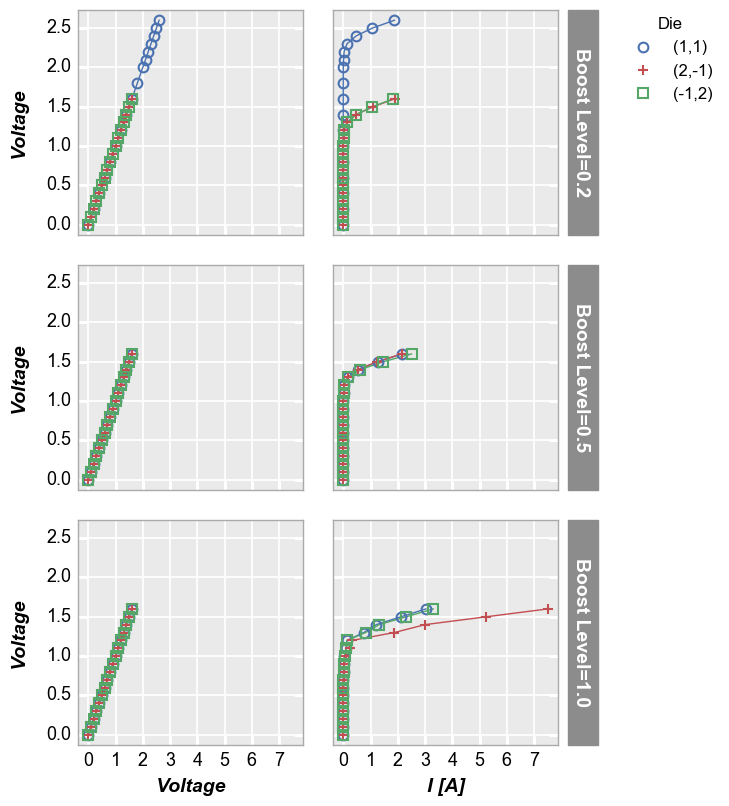

In [15]:
fcp.plot(df1, x=['Voltage', 'I [A]'], y='Voltage', legend='Die', row='Boost Level', col='x', 
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450 & Temperature [C]==75', label_rc_font_size=14)

## wrap subplots

### By unique values

We can create a plot similar to the row/column plot above using the `wrap` keyword.  The key differences are that spacing and ticks between subplots is removed by default (can be changed via keywords), axis sharing is forced (cannot override), and the row/column value labels are condensed to a single label above each subplot.  To do this, remove the `row` and `column` keywords from the previous function call and pass the "Temperature [C]" and "Boost Level" column names as a list to the `wrap` keyword.

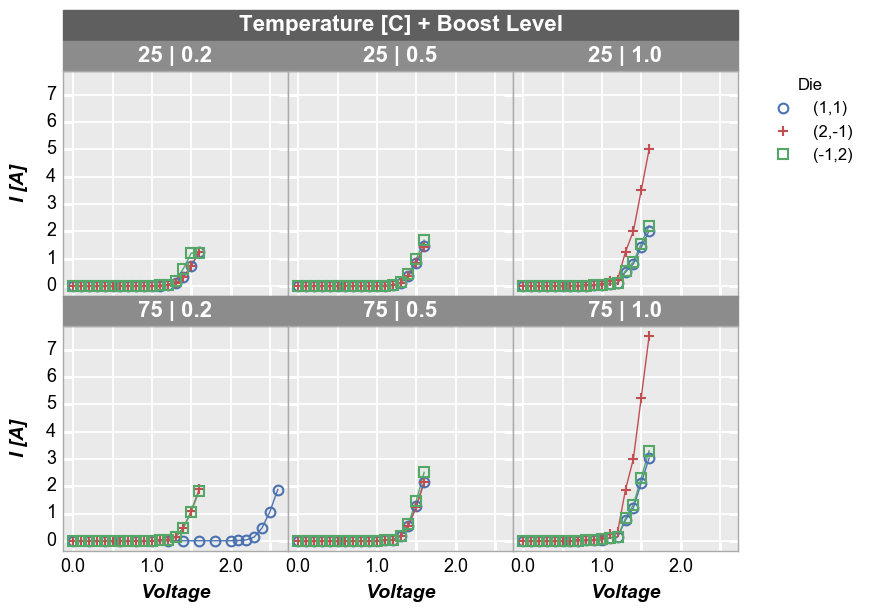

In [16]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450')

By default, wrap plots will be arranged in a square grid.  If the number of subplots does not match a perfectly square grid, you will have an incomplete row of subplots in the grid.  All tick and axes labels are handled appropriately for this case.  If you want to override the default grid size, specify the keyword `ncol` which sets the number of columns.  The number of rows will be automatically determined from the number of subplots.

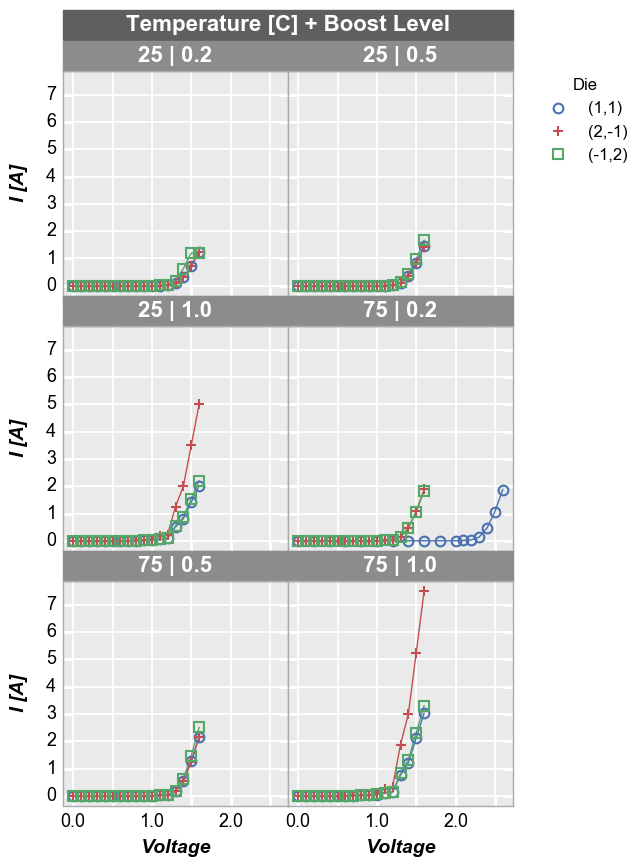

In [17]:
fcp.plot(df1, x='Voltage', y='I [A]', legend='Die', wrap=['Temperature [C]', 'Boost Level'], \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', ncol=2)

### By x and y

We can also "wrap" by column names instead of unique column values.  In this case we list the columns to plot in the `x` or `y` keywords as usual but we add "x" or "y" to the `wrap` keyword.  This will create a unique subplot in a grid for 
each `wrap` value.  Unlike the case of wrapping column values, this plot will not have wrap labels and axis sharing can be overriden.  As before, used `ncol` to override the default gridding.  Unlike a row vs column plot by x and y, a wrap plot by x and y can be displayed without the extra grouping factor. 

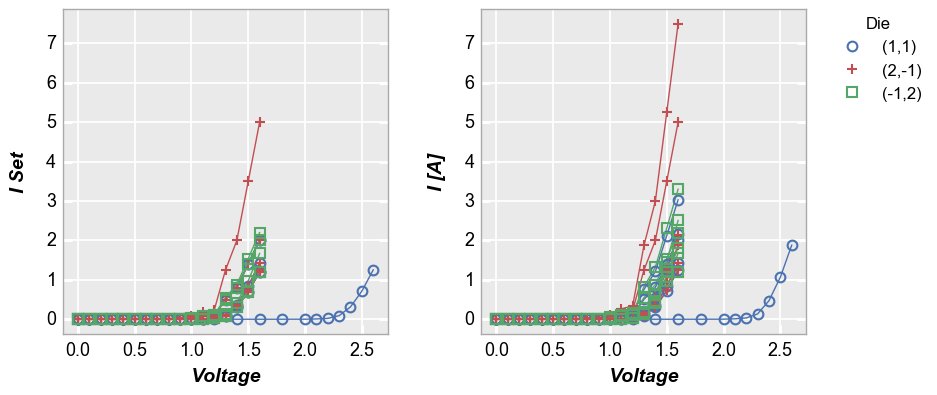

In [18]:
fcp.plot(df1, x='Voltage', y=['I Set', 'I [A]'], legend='Die', wrap='y', 
         groups=['Boost Level', 'Temperature [C]'], ax_size=[325, 325], 
         filter='Substrate=="Si" & Target Wavelength==450')

Or an alternatively styled version of this plot with tick and label sharing off:

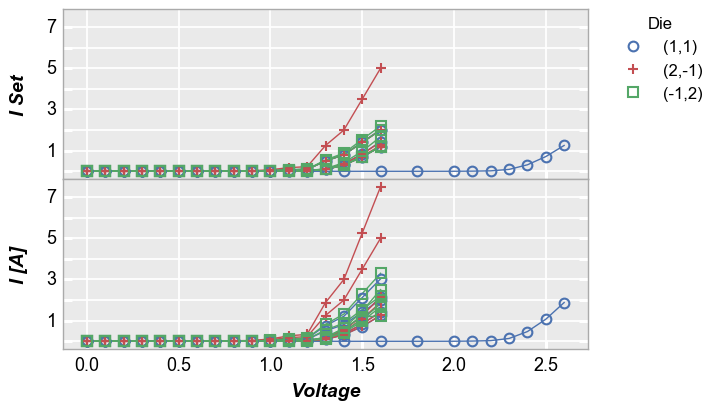

In [19]:
fcp.plot(df1, x='Voltage', y=['I Set', 'I [A]'], legend='Die', wrap='y', 
         groups=['Boost Level', 'Temperature [C]'], ax_size=[525, 170], 
         filter='Substrate=="Si" & Target Wavelength==450', ncol=1, ws_row=0, 
         separate_labels=False, separate_ticks=False)

## figure plots

To add another dimension of grouping, <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> supports grouping by figure.  In this case, a separate figure (i.e., a separate png) is created for each unique value in the DataFrame column(s) listed in the `fig_groups` keyword.  Here we will plot a single figure for each value of the "Die" column.

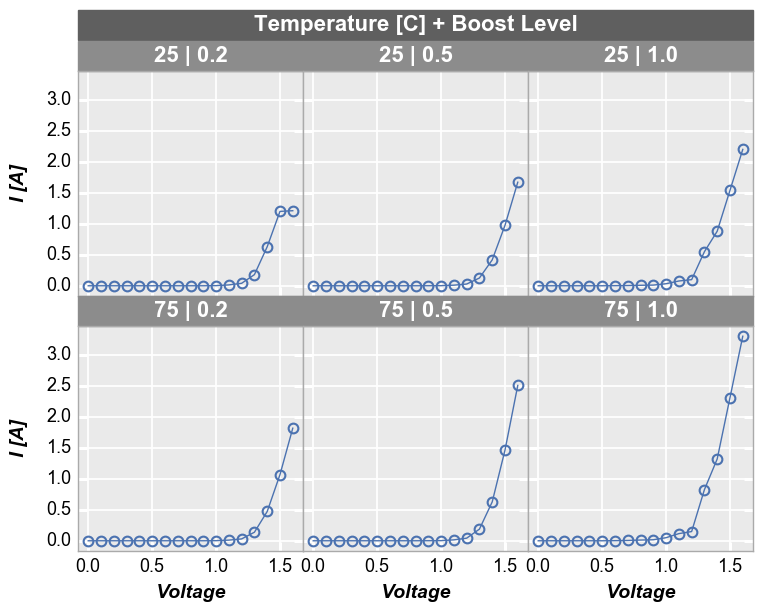

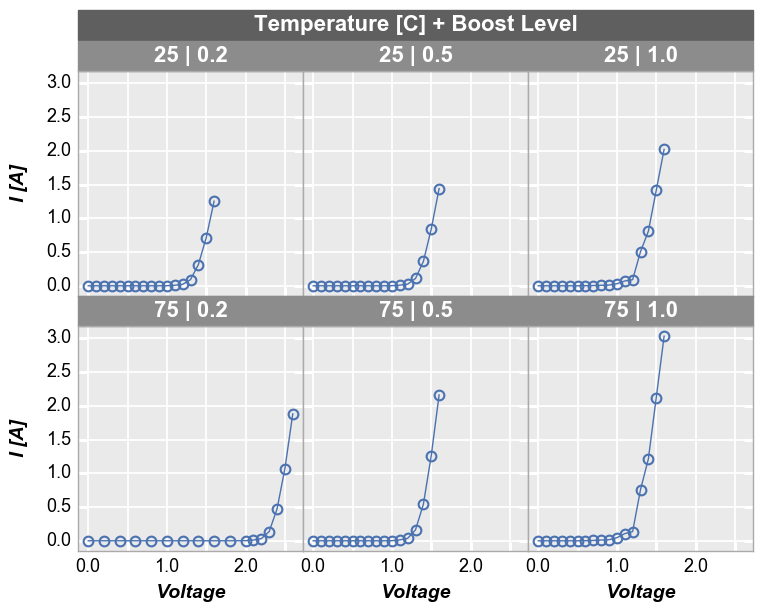

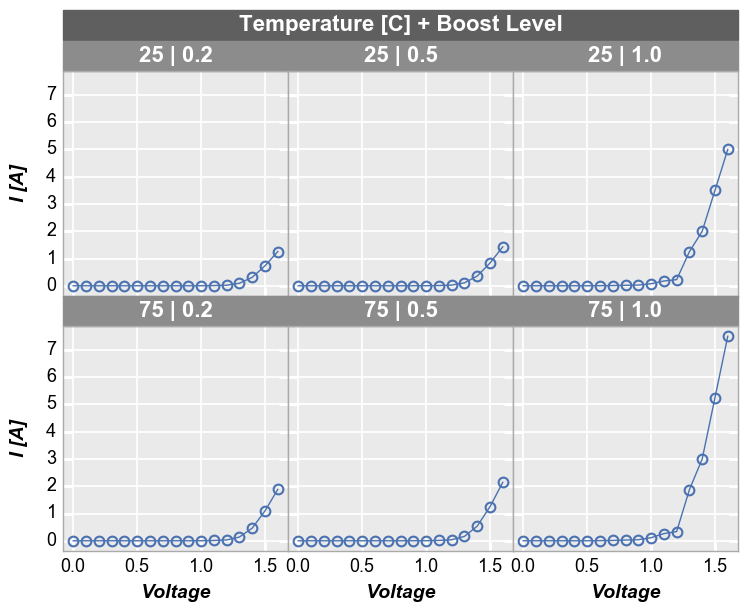

In [11]:
fcp.plot(df1, x='Voltage', y='I [A]', fig_groups='Die', wrap=['Temperature [C]', 'Boost Level'], \
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', show_filename=True,
         filename=r'C:\GitHub\fivecentplots\fivecentplots\tests\test_images\grouping.py\figure.png')